# The Heart Failure Prediction Dataset
The Dataset about heart patients of an Institute of Cardiology.
https://www.kaggle.com/datasets/asgharalikhan/mortality-rate-heart-patient-pakistan-hospital

# Context
Heart disease is easier to treat when detected early, heart disease is the leading cause of death in the all over the world. The term “heart disease” refers to several types of heart conditions. In the Pakistan and some other countries, the most common type of heart disease is coronary artery disease (CAD)

## Content
The data contains complete history of heart patients (so data scientists from different parts of the world can work with it). The dataset is collected from Pakistan, Faisalabad hospital named institute of cardiology.

## About this dataset

- Age : Age of the patient
- Age Group: Such as 21-30 and 31-40 are grouped
- Gender : Sex of the patient
- Locality: Rural or Urban
- Marital status: Married or unmarried
- Smoking: yes/no
- Depression: yes/no
- Mortality: Died= 0 and Alive= 1
- Follow.Up: Number of visiting time
- cp : Chest Pain type chest pain type
- Diabetes: 0 means yes and 1 means no
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- trestbps : resting blood pressure (in mm Hg)
- rest_ecg : resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- PLATELET_COUNT
- Hemoglobin

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import joblib
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set()
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn


%matplotlib inline
from pycaret.regression import *
from pycaret.datasets import get_data


import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [2]:
df  = pd.read_csv('FIC.Full CSV.csv')
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [3]:
#View  the  columns
df.columns

Index(['Age', 'Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'F.History', 'Diabetes', 'HTN', 'Allergies', 'BP',
       'Thrombolysis', 'BGR', 'B.Urea', 'S.Cr', 'S.Sodium', 'S.Potassium',
       'S.Chloride', 'C.P.K', 'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin',
       'P.C.V', 'M.C.V', 'M.C.H', 'M.C.H.C', 'PLATELET_COUNT', 'NEUTROPHIL',
       'LYMPHO', 'MONOCYTE', 'EOSINO', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'SK',
       'SK.React', 'Reaction', 'Mortality', 'Follow.Up'],
      dtype='object')

## Basic EDA and statistical analysis

In [4]:
#viewing the data types
df.dtypes

Age                                                                                           int64
Age.Group                                                                                    object
Gender                                                                                       object
Locality                                                                                     object
Marital status                                                                               object
Life.Style                                                                                   object
Sleep                                                                                        object
Category                                                                                     object
Depression                                                                                   object
Hyperlipi                                                                                    object


In [5]:
##gives information about the data types,columns, null value counts, memory usage etc

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Age.Group                                                                                 368 non-null    object 
 2   Gender                                                                                    368 non-null    object 
 3   Locality                                                                                  368 non-null    object 
 4   Marital status                                                                            368 non-null    object 
 5   Life.Style                                               

In [6]:
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
##also always notice the minimum and maximum of a distribution, might tell alot about outliers

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,368.0,54.293478,8.718158,24.00,50.750,55.000,60.25,77.00
F.History,368.0,0.195652,0.397242,0.00,0.000,0.000,0.00,1.00
Diabetes,368.0,0.461957,0.499229,0.00,0.000,0.000,1.00,1.00
BP,368.0,121.213315,24.539205,80.50,100.700,120.800,140.70,190.11
Thrombolysis,368.0,0.032609,0.177852,0.00,0.000,0.000,0.00,1.00
BGR,368.0,219.991848,139.337387,60.00,117.000,164.000,291.00,563.00
B.Urea,368.0,51.681522,62.582571,2.30,28.000,36.000,43.00,394.00
S.Cr,368.0,1.716902,3.609296,0.60,0.900,0.900,1.10,22.90
S.Sodium,368.0,138.019022,4.079879,129.00,135.000,138.000,141.00,146.00
S.Potassium,368.0,4.210870,0.394984,3.30,3.900,4.200,4.40,5.30


In [7]:
df_copy = df.copy(deep = True)
df_copy.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [8]:

## showing the count of Nans
print(df_copy.isnull().sum())

Age                                                                                         0
Age.Group                                                                                   0
Gender                                                                                      0
Locality                                                                                    0
Marital status                                                                              0
Life.Style                                                                                  0
Sleep                                                                                       0
Category                                                                                    0
Depression                                                                                  0
Hyperlipi                                                                                   0
Smoking                                                     

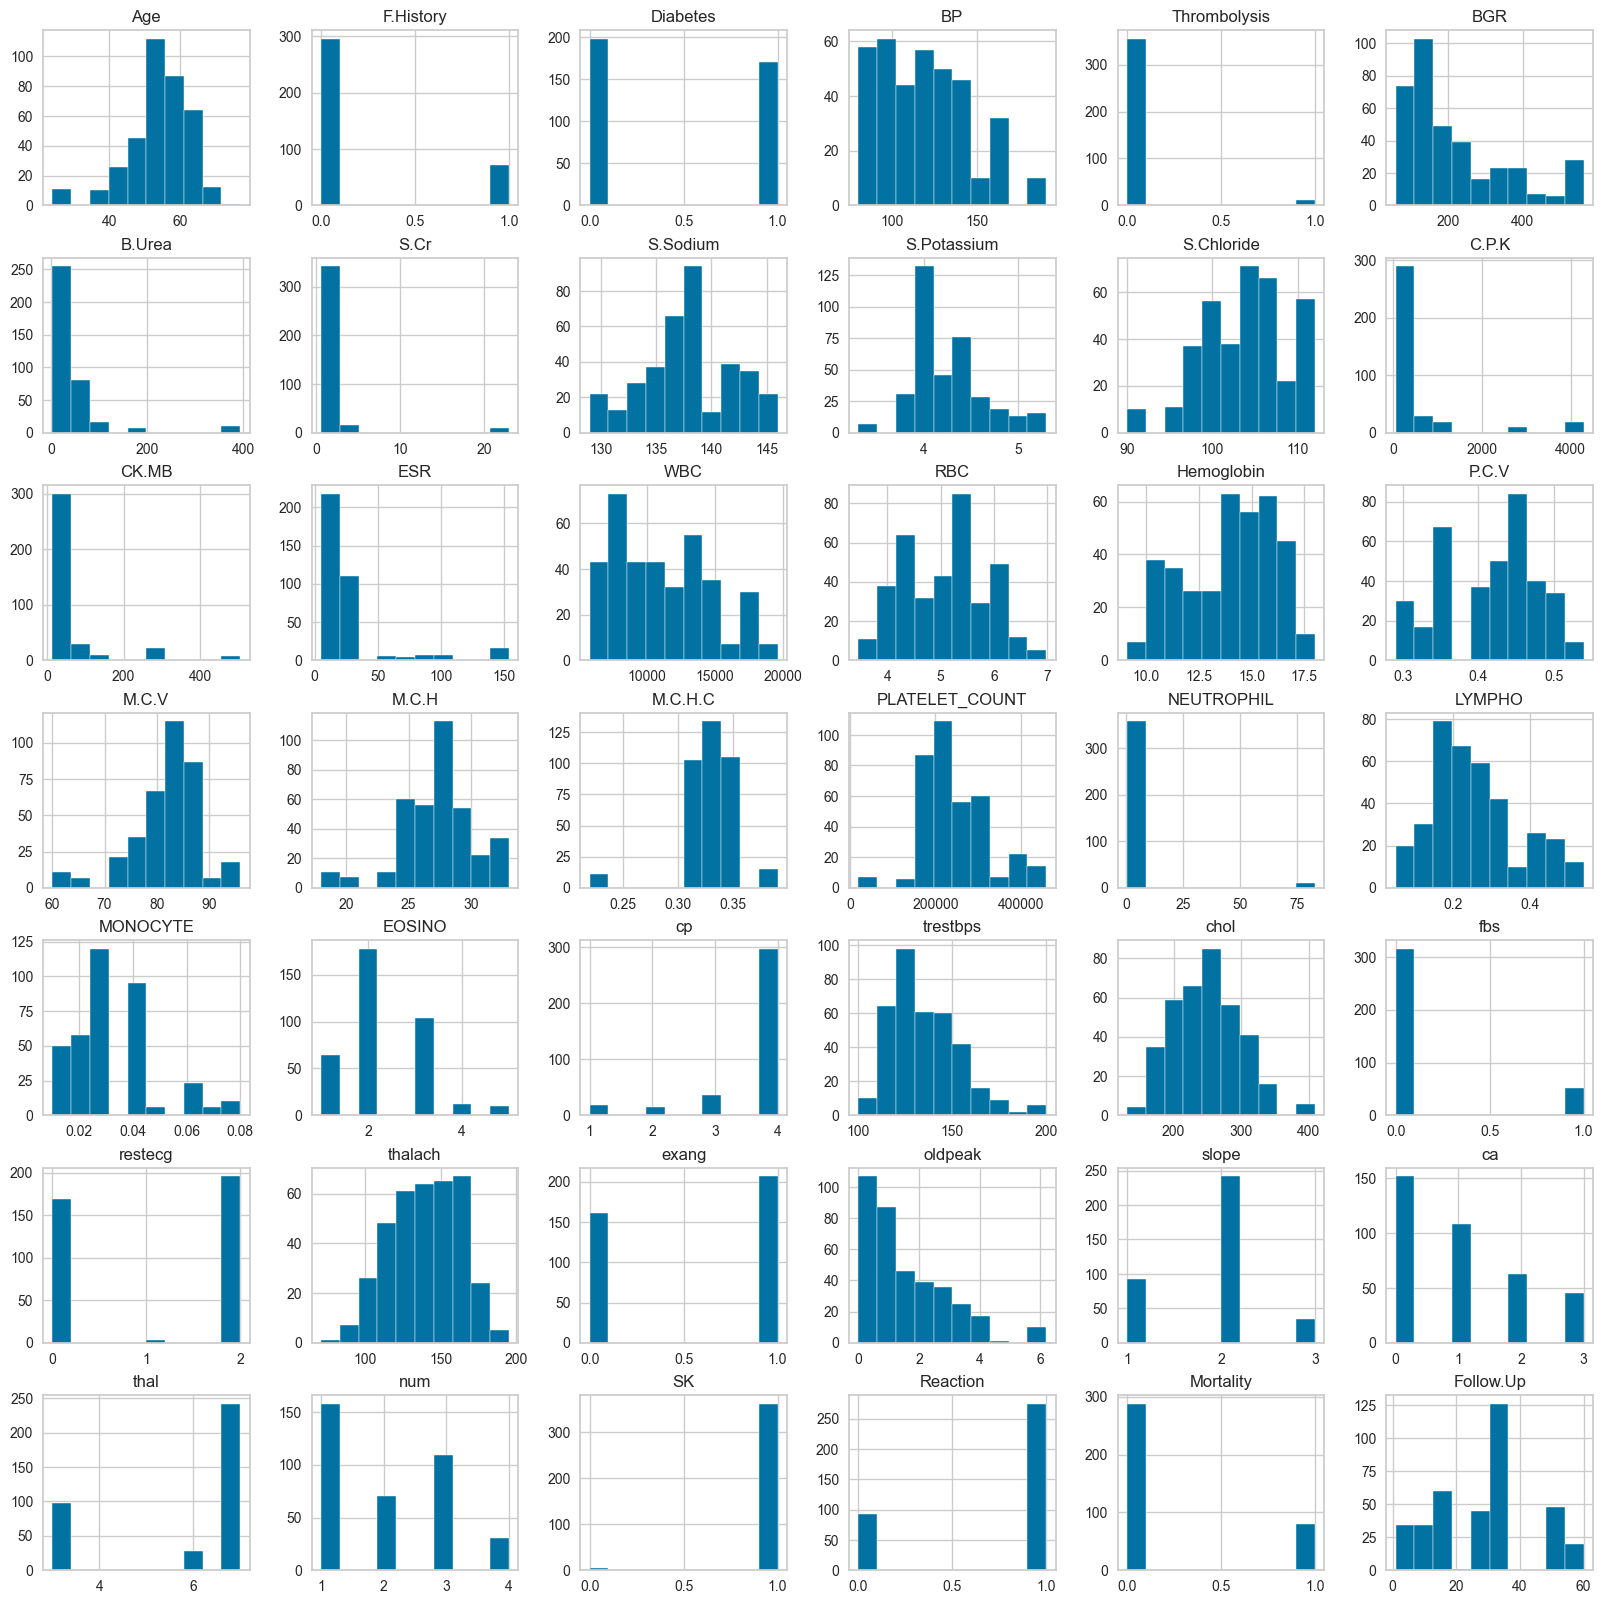

In [9]:
## showing the histogram distribution of the numeric 
p = df_copy.hist(figsize = (20,20))

In [10]:
#pick numeric column to show correlation
df_copy2 = df_copy.select_dtypes(include=['float64', 'int64'])

df_copy2.corr()

,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
Age,1.000000,-0.165327,0.231081,-0.034220,0.101008,-0.073223,0.019354,-0.012162,0.020679,0.063956,...,-0.160281,0.103862,0.147343,0.438851,-0.261194,0.117005,-0.076990,-0.288514,-0.099490,0.172255
F.History,-0.165327,1.000000,-0.058543,0.091555,-0.090549,0.043054,-0.169806,-0.105735,-0.099815,-0.211563,...,0.006904,-0.117903,-0.080862,0.005318,0.032143,-0.023562,0.063495,0.271048,-0.127081,0.068126
Diabetes,0.231081,-0.058543,1.000000,0.013709,-0.170121,-0.239477,0.220138,0.211144,0.029119,0.086394,...,-0.028842,-0.039453,0.085054,0.050180,-0.090673,-0.010611,0.119293,-0.426921,0.317722,-0.048281
BP,-0.034220,0.091555,0.013709,1.000000,-0.116225,0.084895,-0.032729,-0.044125,-0.177179,0.174460,...,0.025394,-0.161551,-0.130320,-0.077802,-0.082335,-0.062612,0.002171,0.116646,-0.041203,0.158229
Thrombolysis,0.101008,-0.090549,-0.170121,-0.116225,1.000000,-0.014503,-0.018159,-0.044157,0.134328,0.088032,...,-0.177338,-0.079647,-0.084403,-0.118623,-0.055372,-0.021147,-0.701222,0.106768,-0.096764,0.201706
BGR,-0.073223,0.043054,-0.239477,0.084895,-0.014503,1.000000,-0.182553,-0.191250,0.104572,-0.118751,...,0.026796,0.044553,0.000053,-0.048990,0.172845,-0.026557,-0.065698,0.332733,-0.113078,0.230562
B.Urea,0.019354,-0.169806,0.220138,-0.032729,-0.018159,-0.182553,1.000000,0.958810,-0.189550,0.461917,...,0.098115,-0.104570,-0.015368,-0.070728,0.029729,0.032640,0.030243,-0.025275,0.069328,-0.176444
S.Cr,-0.012162,-0.105735,0.211144,-0.044125,-0.044157,-0.191250,0.958810,1.000000,-0.225766,0.368047,...,0.105837,-0.107096,0.027721,-0.073509,0.050594,0.069217,0.039894,0.032497,0.082850,-0.156134
S.Sodium,0.020679,-0.099815,0.029119,-0.177179,0.134328,0.104572,-0.189550,-0.225766,1.000000,-0.149939,...,0.005462,0.059878,-0.096929,-0.037350,0.010334,-0.013756,0.032199,-0.072487,-0.021864,0.083227
S.Potassium,0.063956,-0.211563,0.086394,0.174460,0.088032,-0.118751,0.461917,0.368047,-0.149939,1.000000,...,-0.057632,-0.136824,-0.104765,0.014557,-0.155958,-0.058456,0.101464,-0.239204,0.002179,-0.093369


In [11]:
#Factors that contribute to the Mortality rate
df_copy2.corr()['Mortality'].sort_values(ascending = False)[1:]

Diabetes          0.317722
chol              0.175142
LYMPHO            0.106187
M.C.H             0.095050
M.C.V             0.094364
EOSINO            0.087040
S.Cr              0.082850
M.C.H.C           0.082435
B.Urea            0.069328
SK                0.067853
MONOCYTE          0.046161
PLATELET_COUNT    0.040522
slope             0.030498
thal              0.020061
P.C.V             0.016327
ESR               0.015143
S.Chloride        0.011773
Hemoglobin        0.006626
S.Potassium       0.002179
restecg          -0.012401
S.Sodium         -0.021864
fbs              -0.024669
thalach          -0.039567
cp               -0.040081
BP               -0.041203
CK.MB            -0.059392
RBC              -0.078343
C.P.K            -0.086996
NEUTROPHIL       -0.088878
Thrombolysis     -0.096764
trestbps         -0.098750
Age              -0.099490
exang            -0.106243
oldpeak          -0.110228
BGR              -0.113078
num              -0.114000
F.History        -0.127081
W

In [12]:
negative_factor = df_copy2.corr()['Mortality'].sort_values(ascending = False)[1:][19:]

<Axes: >

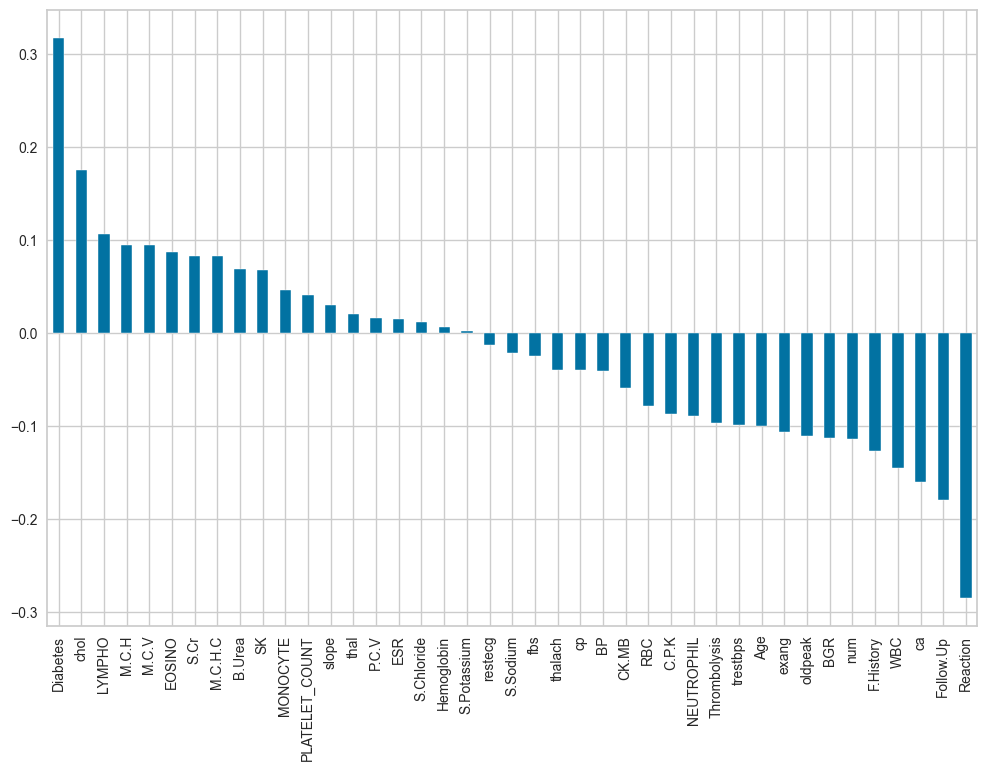

In [13]:
#Factors that contribute to the Mortality rate
plt.figure(figsize = (12,8))
df_copy2.corr()['Mortality'].sort_values(ascending = False)[1:].plot(kind = 'bar')

In [14]:
#positive Factors that contribute to the Mortality rate
df_copy2.corr()['Mortality'].sort_values(ascending = False)[1:][:19]

Diabetes          0.317722
chol              0.175142
LYMPHO            0.106187
M.C.H             0.095050
M.C.V             0.094364
EOSINO            0.087040
S.Cr              0.082850
M.C.H.C           0.082435
B.Urea            0.069328
SK                0.067853
MONOCYTE          0.046161
PLATELET_COUNT    0.040522
slope             0.030498
thal              0.020061
P.C.V             0.016327
ESR               0.015143
S.Chloride        0.011773
Hemoglobin        0.006626
S.Potassium       0.002179
Name: Mortality, dtype: float64

<Axes: >

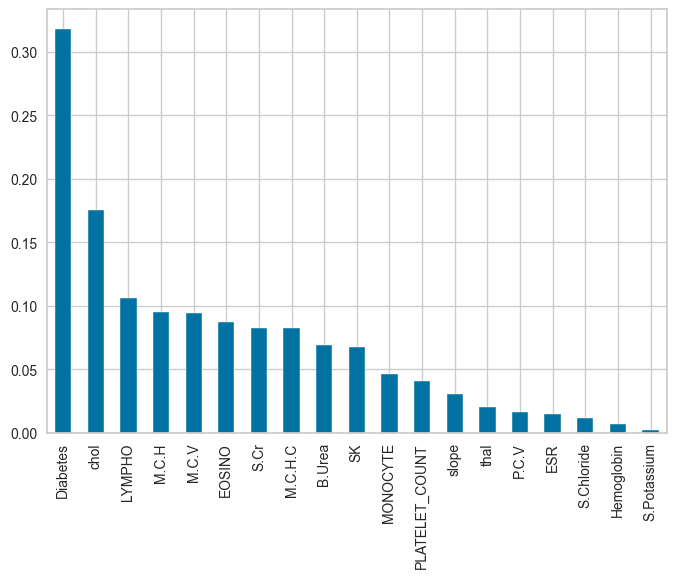

In [15]:
posivive_factors = df_copy2.corr()['Mortality'].sort_values(ascending = False)[1:][:19]
#visual correlation of the #positive Factors that contribute to the Mortality rate
df_copy2.corr()['Mortality'].sort_values(ascending = False)[1:][:19].plot(kind = 'bar')

In [16]:
#remember 0 is died and 1 is alive
df_copy['Mortality'].value_counts()
#data imbalance

Mortality
0    288
1     80
Name: count, dtype: int64

<Axes: xlabel='Mortality', ylabel='count'>

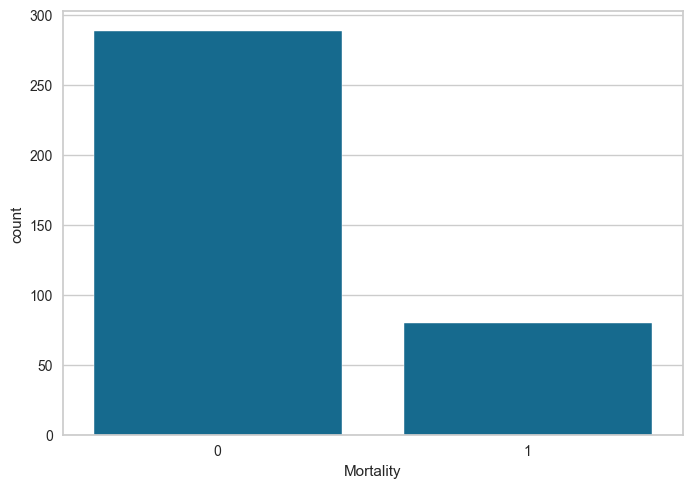

In [17]:
#visual representation of mortality rate
sns.countplot(x = 'Mortality', data = df_copy)

In [18]:
#viewing the age group classification
df_copy['Age.Group'].value_counts()
#we have five age group

Age.Group
51-60    184
61-70     91
41-50     61
31-40     20
21-30     12
Name: count, dtype: int64

<Axes: xlabel='Age.Group', ylabel='count'>

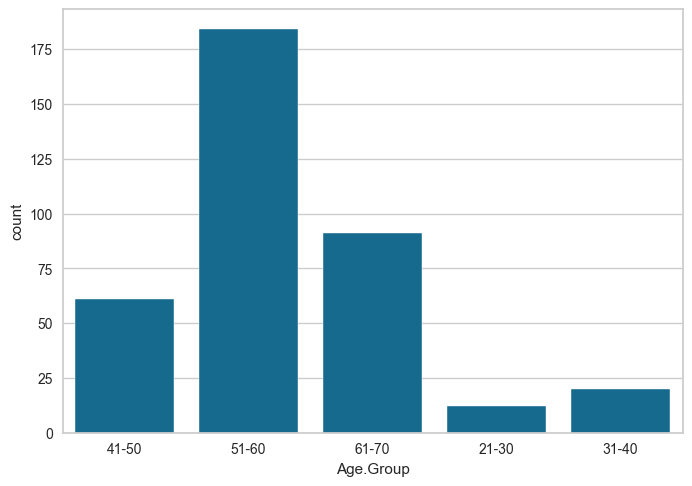

In [19]:
#visualisation of age group classification
sns.countplot(x = 'Age.Group',data = df_copy)

<Axes: xlabel='Age.Group', ylabel='count'>

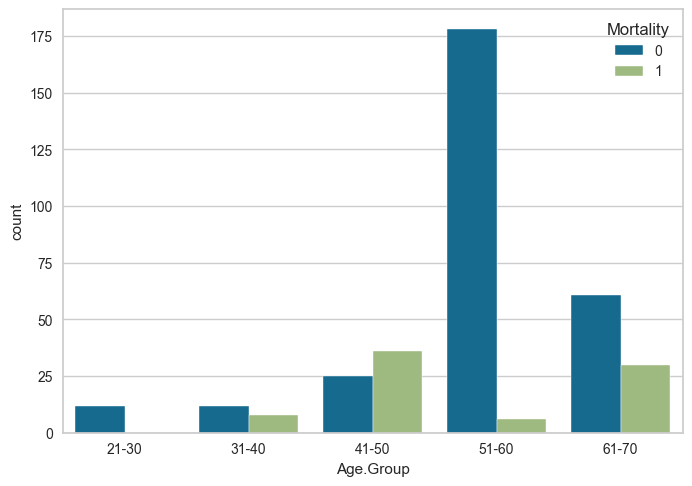

In [20]:
#visualisation of age group classification iwith their survival rate
x = sorted(df_copy['Age.Group'].unique())
sns.countplot(x = 'Age.Group', hue = 'Mortality' ,data = df_copy, order = x)

<Axes: xlabel='Mortality', ylabel='Age'>

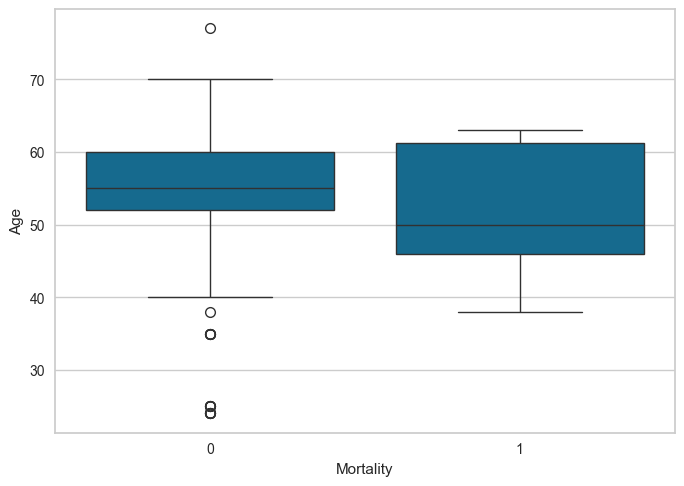

In [21]:
#boxplot showing mean and percetiles of Age as related to mortality
sns.boxplot(x = 'Mortality', y = 'Age', data = df_copy)

<Axes: xlabel='Gender', ylabel='count'>

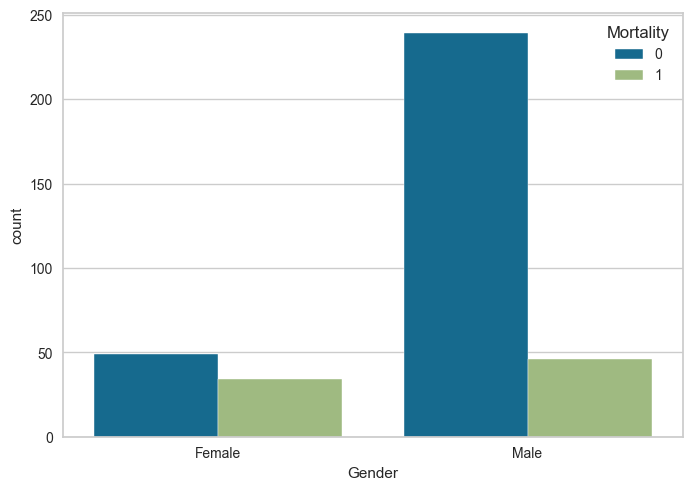

In [22]:
#visualisation of mortality rate by agender distribution
sns.countplot(x = 'Gender',hue = 'Mortality',data = df_copy)

<Axes: xlabel='Age.Group', ylabel='count'>

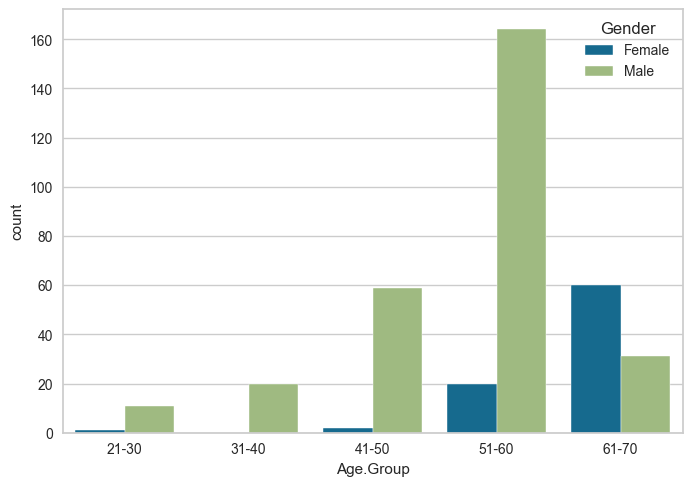

In [23]:
#shows gender distribution with age group, more male are having cancer  at early age aand at age 51-60
x = sorted(df_copy['Age.Group'].unique())
sns.countplot(x = 'Age.Group',hue = 'Gender', data = df_copy, order = x)

<Axes: xlabel='Gender', ylabel='Age'>

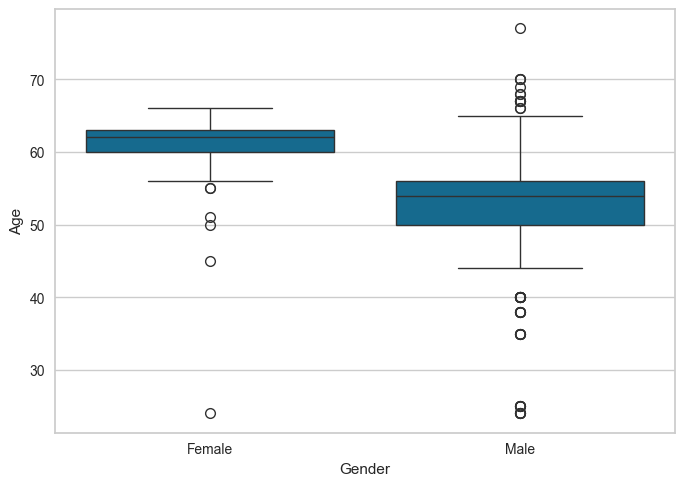

In [24]:
#shows gender distribution with age
#cancer prevalent in men at younger age
sns.boxplot(x = 'Gender', y = 'Age', data = df_copy)

<Axes: xlabel='Sleep', ylabel='count'>

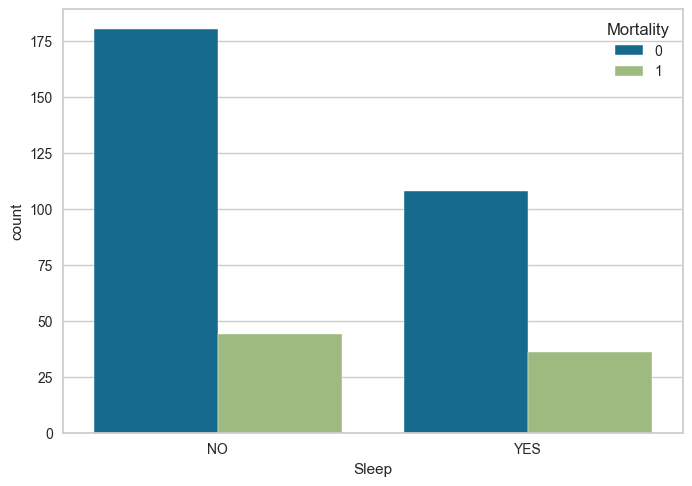

In [25]:
sns.countplot(x = 'Sleep',hue = 'Mortality', data = df_copy)
#sleep does not play too much factor

<Axes: xlabel='Diabetes', ylabel='count'>

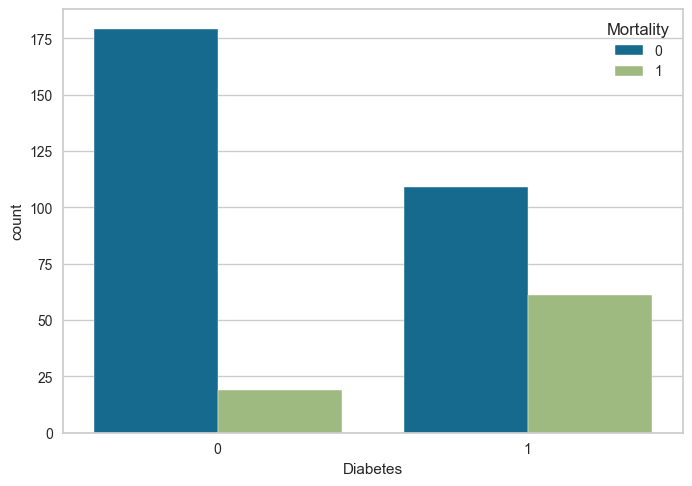

In [26]:
#people with diabetes have higher chance of dying via hEART ATTACK
sns.countplot(x = 'Diabetes',hue = 'Mortality', data = df_copy)

<Axes: xlabel='Family.History', ylabel='count'>

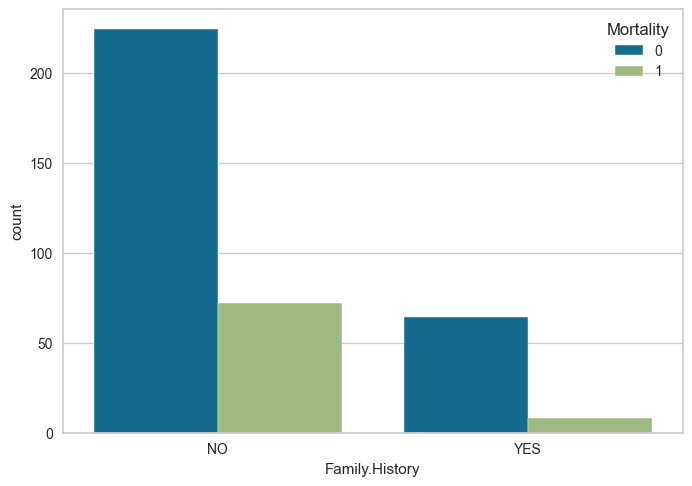

In [27]:
sns.countplot(x = 'Family.History',hue = 'Mortality', data = df_copy)
#mortality rate with family history,

## DATA PREPROCESSING

very difficult to work with this data as there is no proper domain knowledge to decide what factors affect or combination affect or bring about cancer, hence all factor might be important

In [28]:
df_copy.select_dtypes(['object']).columns

Index(['Age.Group', 'Gender', 'Locality  ',
       'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'HTN', 'Allergies', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'SK.React'],
      dtype='object')

In [29]:
#dropping Age.group as it's smilar with age
df_copy.drop('Age.Group',axis = 1, inplace = True)

# Data Modelling

Pycaret a python library allows to pick the best algorithim for modelling,using pycaret to pick the best model

In [30]:
#split data, into train and test
data = df_copy.sample(frac = 0.75, random_state = 786)  #split data 75,25
data_unseen =  df_copy.drop(data.index)  #drop the data that are present in the data,so they are differe

data.reset_index(drop= True,inplace = True) #srearrange the indexes
data_unseen.reset_index(drop= True,inplace = True)


print('data for modelling :' + str(data.shape))

print('unseen data for predictions :' + str(data_unseen.shape))

data for modelling :(276, 59)
unseen data for predictions :(92, 59)


In [31]:
#load the data into the pycaret set up, normalize the numeric feature and create label encoding for the ordinal feature
from pycaret.classification import *




clf_setup = setup(data=df_copy, 
                  target='Mortality', 
                  profile=True, 
                  session_id=123,
                  normalize = True, 
                  log_experiment = True,
                  experiment_name = 'Cancer-mortality')

,Description,Value
0,Session id,123
1,Target,Mortality
2,Target type,Binary
3,Original data shape,"(368, 59)"
4,Transformed data shape,"(368, 81)"
5,Transformed train set shape,"(257, 81)"
6,Transformed test set shape,"(111, 81)"
7,Numeric features,41
8,Categorical features,17
9,Preprocess,True


Loading profile... Please Wait!


In [32]:
#pycaret runs through the data searching for algorithim that fits the data

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9612,0.9494,0.9300,0.9062,0.9143,0.8893,0.8924,0.0460
ada,Ada Boost Classifier,0.9609,0.9523,0.8933,0.9314,0.9064,0.8820,0.8865,0.0740
et,Extra Trees Classifier,0.9574,0.9915,0.8933,0.9321,0.8982,0.8719,0.8827,0.0860
catboost,CatBoost Classifier,0.9571,0.9902,0.8933,0.9148,0.8973,0.8705,0.8756,1.1610
gbc,Gradient Boosting Classifier,0.9534,0.9749,0.9133,0.8940,0.8959,0.8663,0.8723,0.0860
rf,Random Forest Classifier,0.9532,0.9860,0.8933,0.9040,0.8907,0.8613,0.8675,0.0940
xgboost,Extreme Gradient Boosting,0.9494,0.9568,0.8933,0.8874,0.8832,0.8512,0.8568,0.0630
dt,Decision Tree Classifier,0.9414,0.9318,0.9133,0.8607,0.8756,0.8385,0.8472,0.0490
lda,Linear Discriminant Analysis,0.8952,0.8952,0.7333,0.8092,0.7485,0.6839,0.6996,0.0400
svm,SVM - Linear Kernel,0.8835,0.8884,0.7200,0.8030,0.7319,0.6611,0.6795,0.0540


## Create a Model

using a catboost classfier model, high accuracy,high AUC,a goof f1 score which is a balance of recall and precision

In [33]:

# Create a CatBoost model
catboost_model = create_model('catboost')



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9615,1.0000,1.0000,0.8333,0.9091,0.8850,0.8909
1,0.9615,0.9667,0.8333,1.0000,0.9091,0.8850,0.8909
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9615,1.0000,0.8333,1.0000,0.9091,0.8850,0.8909
4,0.9615,1.0000,1.0000,0.8571,0.9231,0.8976,0.9024
5,0.9615,1.0000,1.0000,0.8571,0.9231,0.8976,0.9024
6,0.9231,0.9750,0.6667,1.0000,0.8000,0.7547,0.7785
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [34]:
#evaluate the model to see the matrix
evaluate_model(catboost_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [35]:
evaluate_model(catboost_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

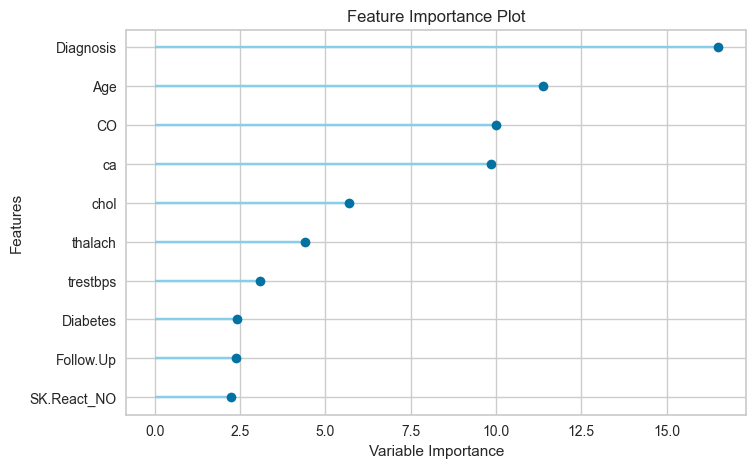

In [36]:
# Show the feature importance on the algorithm
plot_model(catboost_model, plot='feature')

## Scikit Learn and MlFlow for data modelling and production

In [37]:
#pick the object column for one hot encoding
cat_features = df_copy.select_dtypes(['object']).columns

cat_features

Index(['Gender', 'Locality  ', 'Marital status                       ',
       'Life.Style                                                                              ',
       'Sleep', 'Category', 'Depression', 'Hyperlipi', 'Smoking',
       'Family.History', 'HTN', 'Allergies', 'Others ', 'CO', 'Diagnosis',
       'Hypersensitivity', 'SK.React'],
      dtype='object')

In [38]:
#pick the int column for transformation
num_features = df_copy.select_dtypes(['float64', 'int64']).columns
num_features = num_features.drop('Mortality')

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.sklearn
from urllib.parse import urlparse
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score,confusion_matrix




if __name__ == "__main__":
    warnings.filterwarnings("ignore")
    
    # Split the data into features and target
    X_train = data.drop('Mortality', axis=1)
    y_train = data['Mortality']
    X_test = data_unseen.drop('Mortality', axis=1)
    y_test = data_unseen['Mortality']
    
    
    # Define column names
    numeric_features = num_features 
    categorical_features = cat_features
    
    
    
        # Preprocessing for numerical data
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(drop='first'))  # drop='first' to avoid dummy variable trap
    ])
    
    
        # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    mlflow.set_tracking_uri(uri="")
    
    print("The set tracking uri is ", mlflow.get_tracking_uri())
    
    
    
    l2_leaf_reg = 3
    learning_rate = 0.0057669999077916145
    
        # End any existing MLflow runs
    if mlflow.active_run():
        mlflow.end_run()
        
        
        
    # Start a new MLflow run
    with mlflow.start_run():
        
    
    # Create a pipeline that combines preprocessing and the CatBoost model
        model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', CatBoostClassifier(l2_leaf_reg = 3,learning_rate = 0.0057669999077916145,verbose=0, random_state=123))
            ])
        
         # Fit the pipeline to the training data
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        y_pred_proba = model.predict_proba(X_test)[:, 1]


        
        
        # Evaluate the model
        
        Accuracy= accuracy_score(y_test, y_pred)
        AUC = roc_auc_score(y_test, y_pred_proba)
        Classification_Report = classification_report(y_test, y_pred)
        Confusion_Matrix= confusion_matrix(y_test,y_pred)
        
        
        print('Accuracy:', accuracy_score(y_test, y_pred))
        
        print('Confusion_Matrix: \n', confusion_matrix(y_test,y_pred))
        
        print('AUC:', roc_auc_score(y_test, y_pred_proba))
        
        
        print('Classification Report:\n', classification_report(y_test, y_pred))
        
        
        # Log parameters and metrics to MLflow
        
        params ={
        
        "l2_leaf_reg": l2_leaf_reg,
        "learning_rate":learning_rate
            
        }
        mlflow.log_params(params)
        
        metrics = {
        "Accuracy": Accuracy,
        
        "AUC": AUC,
 
        }
        
        mlflow.log_metrics(metrics)
        
        mlflow.sklearn.log_model(model, "Heart_condition")

        

        
            
            
        mlflow.end_run()



The set tracking uri is  
Accuracy: 0.9565217391304348
Confusion_Matrix: 
 [[71  0]
 [ 4 17]]
AUC: 0.9973172367538564
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.81      0.89        21

    accuracy                           0.96        92
   macro avg       0.97      0.90      0.93        92
weighted avg       0.96      0.96      0.95        92



Note: It's a medical data, hence hard to do much preprocessing on the column,as zero domain knowledge might affect on picking important data, and too much column also affect training time and also the amount of data is also way too small